In [1]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
insurance = pd.read_csv('insurance.csv')

PUNKT 1

Początkowy zbiór danych insurance.csv zawiera 1338 obserwacji - każda obserwacja dotyczy pojedynczej osoby, dla której przedstawiono wartości takie jak:
- age: liczba naturalna określająca wiek danej osoby w latach
- sex: zmienna przyjmująca wartości 'female' i 'male' w zależności od płci danej osoby
- bmi: zmienna liczbowa prezentująca wskaźnik BMI danej osoby
- children: zmienna przyjmujjąca wartości liczbowe określająca liczbę posiadanych dzieci
- smoker: zmienna przyjmująca wartość 'yes' jeśli dana osoba pali papierosy, oraz wartość 'no' w przeciwnym wypadku
- region: zmienna tekstowa oznaczająca region zamieszkania danej osoby
- charges: kwota składki jaką dana osoba płaci na ubezpieczenie 

W tym kroku sprawdzono również kompletność zbioru danych (nie wysątpiły żadne braki danych)

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


PUNKT 2 - STATYSTYKI OPISOWE ZMIENNYCH

WIEK
Na podstawie statystyk opisowych możemy stwierdzić, że średni wiek osoby w zbiorze danych wynosi 39 lat a odchylenie standardowe wynosi 14 lat. Najmłodsza osoba ma 18 lat, a najstarsza 64.
Biorąc pod uwagę kwantyle możemy powiedzieć, że: 
- 25% obserwacji ma wiek poniżej 27 lat, 
- 50% obserwacji ma wiek poniżej 39 lat,
- 75% obserwacji ma wiek poniżej 51 lat

WSKAŹNIK BMI
Średnia wartość wskaźnika BMI wynosi 30,66 z odchyleniem standardowym równym 6,098. Najniższe BMI wynosi 15,96 a najwyższe 53,13.
Biorąc pod uwagę kwantyle możemy powiedzieć, że: 
- 25% obserwacji ma BMI poniżej 26,29625, 
- 50% obserwacji ma BMI poniżej 30.4,
- 75% obserwacji ma BMI poniżej 34.69375,

LICZBA DZIECI
Średnia liczba dzieci wynosi około 1,09 z odchyleniem standardowym równym około 1,2. Wśród obserwacji znajdują się osoby nie posiadające dzieci, a osoby, które maja ich najwięcej posiadają 5 dzieci.
Biorąc pod uwagę kwantyle możemy powiedzieć, że: 
- 25% obserwacji nie posiada dzieci, 
- 50% obserwacji nie posiada dzieci lub ma jedno dziecko,
- 75% obserwacji nie posiada dzieci lub ma jedno lub dwójkę dzieci,

WYSOKOŚĆ SKŁADKI
Średnia wysokość składki na ubepieczenie wynosi około 13270,42 jednostki pieniężne, a odchylenie standardowe wynosi około 12110,01 jednostki pieniężne. Minimalna kwota składki na ubezpieczenie wynosi 1121,8739 a maksymalna 63770,42801
Biorąc pod uwagę kwantyle możemy powiedzieć, że: 
- 25% obserwacji płaci składkę niższą lub równą niż 4740.28715 jednostek pieniężnych, 
- 50% obserwacji płaci składkę niższą lub równą niż 9382.033 jednostek pieniężnych,
- 75% obserwacji płaci składkę niższą lub równą niż 16639.912515 jednostek pieniężnych,


W tym kroku dokonano również przekształcenia zmiennych smoker oraz region:

- zmienna smoker: utworzono nową zmienną binarną smoker_b przyjmującą wartość 1 oznaczającą, że dana osoba pali papierosy, oraz 0 w przeciwnym wypadku

- zmienna region: utworzono 4 nowe zmienne binarne, przyjmujące wartość 1 jeśli dana osoba mieszka w danym regionie, oraz 0 w przeciwnym wypadku:
    -> southwest_b
    -> northeast_b
    -> northwest_b
    -> southeast_b

    a następnie usunieto zmienną smoker oraz region

In [7]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
by_region = insurance.groupby('region')

In [9]:
by_region['region'].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: region, dtype: int64

In [10]:
insurance['smoker_b'] = insurance['smoker'].map({'yes': 1, 'no': 0})
insurance['northeast_b'] = insurance['region'].map({'northeast': 1, 'northwest': 0, 'southeast': 0, 'southwest': 0})
insurance['northwest_b'] = insurance['region'].map({'northeast': 0, 'northwest': 1, 'southeast': 0, 'southwest': 0})
insurance['southeast_b'] = insurance['region'].map({'northeast': 0, 'northwest': 0, 'southeast': 1, 'southwest': 0})
insurance['southwest_b'] = insurance['region'].map({'northeast': 0, 'northwest': 0, 'southeast': 0, 'southwest': 1})

In [11]:
insurance = insurance.drop('region', axis=1)
insurance = insurance.drop('smoker', axis=1)
insurance.head()

,age,sex,bmi,children,charges,smoker_b,northeast_b,northwest_b,southeast_b,southwest_b
0,19,female,27.900,0,16884.92400,1,0,0,0,1
1,18,male,33.770,1,1725.55230,0,0,0,1,0
2,28,male,33.000,3,4449.46200,0,0,0,1,0
3,33,male,22.705,0,21984.47061,0,0,1,0,0
4,32,male,28.880,0,3866.85520,0,0,1,0,0


PUNKT 3 - WYKRESY ROZKŁADU ORAZ KORELACJI ZMIENNYCH

Wykres 1:
Na podstawie wykresów zależności dla zmiennych trudno zaobserwować zależność liniową pomiędzy zmiennymi zależnymi a zmienną charges.
Na przekątnej siatki wykresów znajdują się histogramy, na których możemy zaobserwować rozkad każdej zmiennej.

Wykres 2:
Zmienne age, children, bmi, smkoer_b są dodatnio skorelowane z wysokością składki.
Zmienna charges jest najsilniej skorelowana ze zmiennymi smoker_b i age

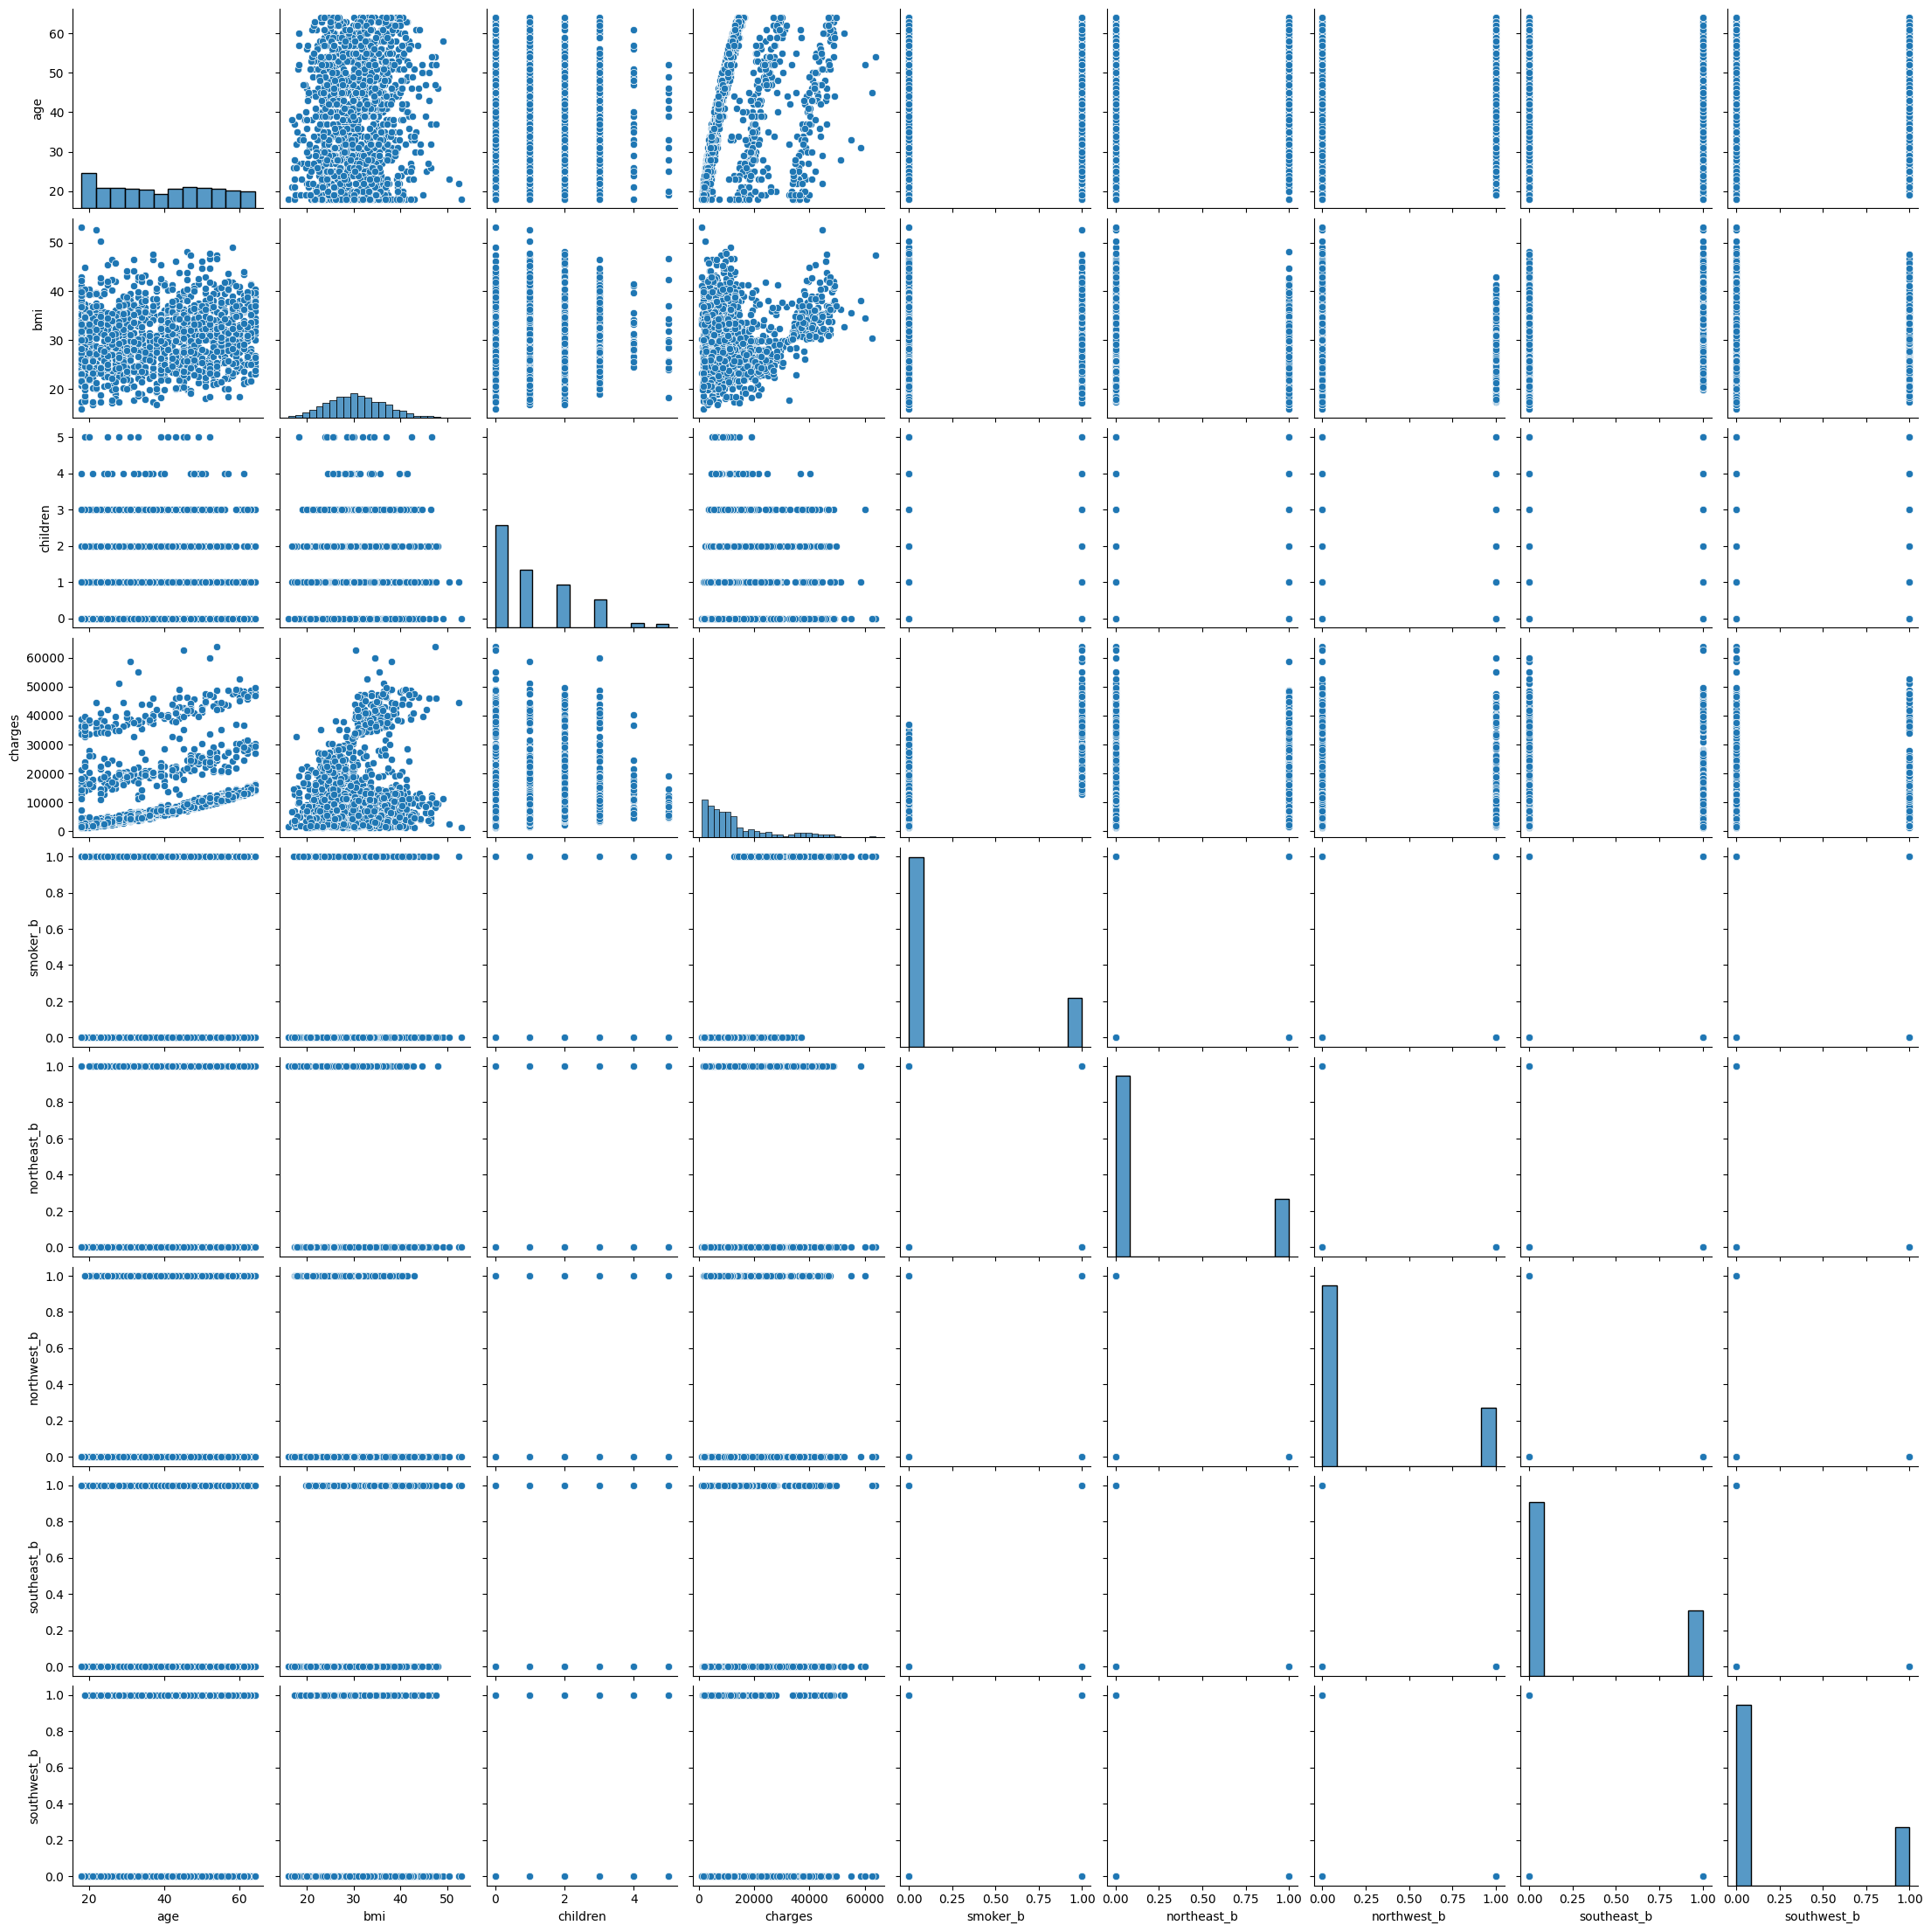

In [12]:
## wykres 1
sns.pairplot(insurance)

<Axes: >

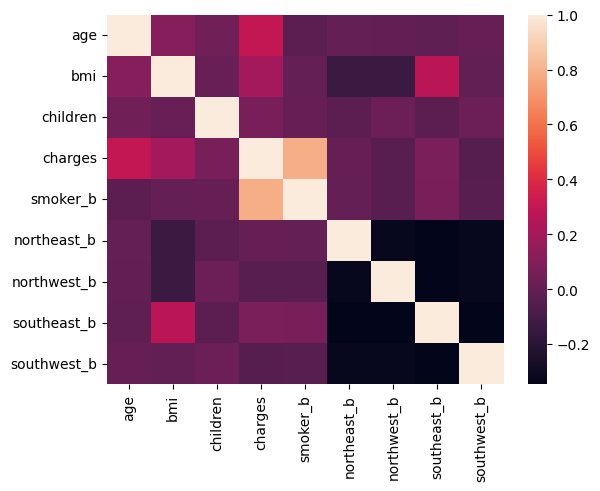

In [13]:
## wykres 2
numeric_df = insurance.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr())

PUNKT 4 - WYKRES ROZKŁADU ZMIENNEJ ZALEŻNEJ

Wartości zmiennej charges są skoncentrowane wokół niższych wartości - na podstawie wzrokowej obserwacji można stwierdzić, że zbiór posiada skośność prawostronną.
 


C:\Users\izabe\AppData\Local\Temp\ipykernel_33408\2135298546.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['charges'])


<Axes: xlabel='charges', ylabel='Density'>

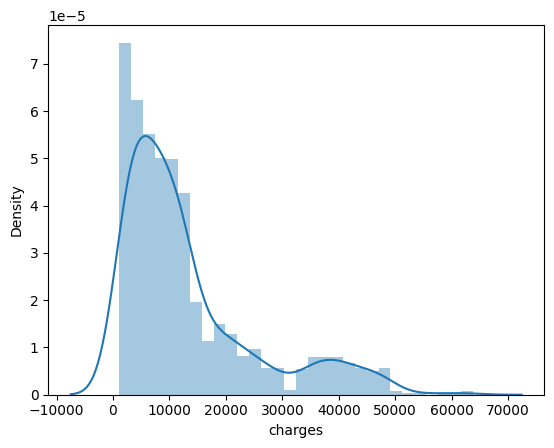

In [14]:
sns.distplot(insurance['charges'])

PUNKT 5 - MODELE ZBUDOWANE ZA POMOCA STATMODELS ORAZ SKLEARN

Do zbudowania modelu wybrano zmienne: age, children, smoker_b oraz bmi.
Zmienna zależna w utworzonych modelach to zmienna charges

SKLEARN

In [15]:
## wybór zmiennych
X = insurance[['age', 'children', 'smoker_b',
               'bmi']]
y = insurance['charges']

In [16]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
## podział zbioru na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
## budowa modelu

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression()

In [23]:
## wyraz wolny w modelu
print(lm.intercept_)

-12403.305424301809


STATMODELS

In [24]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import statsmodels.api as sm

In [26]:
## wybór zmiennych
X2 = insurance[['age', 'children', 'smoker_b', 'bmi']]
y2 = insurance['charges'] 

In [27]:
x2 = sm.add_constant(X)

In [28]:
## budowa modelu
model = sm.OLS(y2, X2)
results = model.fit()

In [29]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              2277.
Date:                Sun, 03 Dec 2023   Prob (F-statistic):                        0.00
Time:                        18:45:00   Log-Likelihood:                         -13629.
No. Observations:                1338   AIC:                                  2.727e+04
Df Residuals:                    1334   BIC:                                  2.729e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

PUNKT 6 - predykcje i ocenę dopasowania na zbiorze testowym - wykres + miary MAE, RMSE

Na podstawie obserwacji wzrokowej wykresów można stwierdzić, że oba modele najtrafniej przewidują wielkość składki ubezpieczeniowej, jeśli jest ona niska (mniejsza niż około 1500). Na podstawie porównania wykresów można stwierdzić, że model 1 charakteryzuje się lepszymi prognozami.
Ten wniosek potwierdzają miary MAE, MSE, RMSE. Dla modelu 1 otrzymujemy mniejsze błędy niż dla modelu 2, co oznacza lepsze dopasowanie na zbiorze testowym modelu 1 niż modelu 2.

In [30]:
## predykcje na zbirze testowym
predictions1 = lm.predict(X_test)
predictions2 = results.predict(X2)

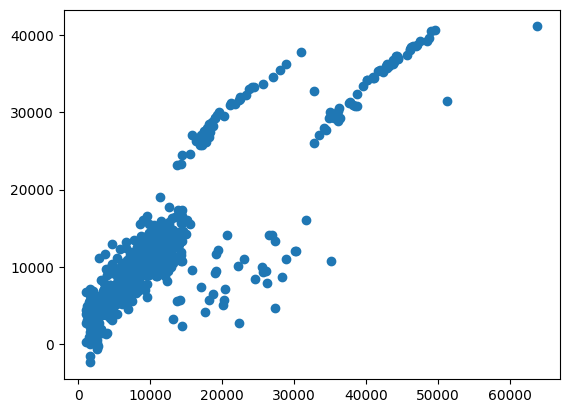

In [31]:
plt.scatter(y_test,predictions1)

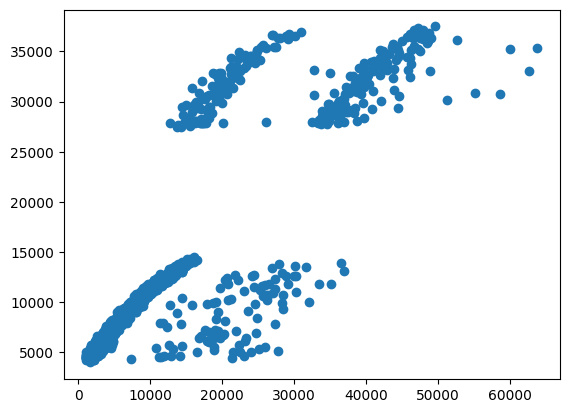

In [32]:
plt.scatter(y2,predictions2)

In [33]:
from sklearn import metrics

In [34]:
## miary MAE, MSE, RMSE dla modelu 1
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

MAE: 3926.8215428226517
MSE: 31720173.42455121
RMSE: 5632.066532326408


In [35]:
## miary MAE, MSE, RMSE dla modelu 2
print('MAE:', metrics.mean_absolute_error(y2, predictions2))
print('MSE:', metrics.mean_squared_error(y2, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2, predictions2)))

MAE: 4442.957027349537
MSE: 41222873.95734411
RMSE: 6420.50418248786


PUNKT 7 - interpretacja oszacowań modelu oraz własności statystycznych modelu

Dla modelu SKLEARN
- Dla wzrostu wieku o jednostkę, wysokość składki na ubezpieczenie rośnie o około 234.55 jednostek, przy zachowaniu stałych pozostałych zmiennych w modelu.
- Dla wzrostu liczby dzieci o 1, wysokość składki na ubezpieczenie rośnie o około 474.96 jednostek, przy zachowaniu stałych pozostałych zmiennych w modelu.
- Jeśli osoba jest osoba palącą, wysokość składki na ubezpieczenie rośnie o około 23565.50 jednostek, przy zachowaniu stałych pozostałych zmiennych w modelu.
- Dla wzrostu BMI o jednostkę, wysokość składki na ubezpieczenie rośnie o około 364.43 jednostek, przy zachowaniu stałych pozostałych zmiennych w modelu.

Dla modelu STATMODELS
- Dla wzrostu wieku o jednostkę, wysokość składki na ubezpieczenie rośnie o około 197.67 jednostek, przy zachowaniu stałych pozostałych zmiennych w modelu.
- Dla wzrostu liczby dzieci o 1, wysokość składki na ubezpieczenie rośnie o około 240.55 jednostek, przy zachowaniu stałych pozostałych zmiennych w modelu.
- Jeśli osoba jest osoba palącą, wysokość składki na ubezpieczenie rośnie o około 23310 jednostek, przy zachowaniu stałych pozostałych zmiennych w modelu.
- Dla wzrostu BMI o jednostkę, wysokość składki na ubezpieczenie rośnie o około 28.01 jednostek, przy zachowaniu stałych pozostałych zmiennych w modelu.

In [36]:
print(lm.intercept_)

-12403.305424301809


In [37]:
## oszacowania dla modelu sklearn
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,234.545931
children,474.961238
smoker_b,23565.497076
bmi,364.431091


In [39]:
## model z statmodels
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              2277.
Date:                Sun, 03 Dec 2023   Prob (F-statistic):                        0.00
Time:                        18:46:36   Log-Likelihood:                         -13629.
No. Observations:                1338   AIC:                                  2.727e+04
Df Residuals:                    1334   BIC:                                  2.729e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [40]:
## współczynik R^2 dla modelu sklearn
r2 = lm.score(X_train, y_train)
r2

0.7370743139709393

Na podstawie wartości współczynnika R^2 należy stwierdzić, że około 87.2% zmienności wysokości składki na ubezpieczenie jest wyjaśnione przez model 1 oraz około 73.7% tej zmienności przez model 2.
Model 1 jest lepiej dopasowany do danych.

In [ ]:
W modelu 2 przy poziomie istotności 5 % zmienna age i smoker_b są istotne.
Test Jarque-Bera wskazuje na brak rozkładu normalnego reszt, należy odrzucić hipotezę zerową o normalności rozkładu reszt.